# Contents <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Análisis exploratorio de datos](#data_review)
    * [Conclusions](#data_review_conclusions)
    * [Tipos de Datos](#type_data)
* [Etapa 2. Análisis de los datos](#seg_data)
* [Etapa 3. Desarrollo del modelo](#hypotheses)
* [Conclusiones](#end)

## Introducción <a id='intro'></a>
Debemos preparar un prototipo de un modelo de machine learning para Zyfra. La empresa desarrolla soluciones de eficiencia para la industria pesada. El modelo debe predecir la cantidad de oro extraído del mineral de oro. Disponemos de los datos de extracción y purificación. El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables, os datos se almacenan en tres archivos:
- 'gold_recovery_train.csv' — el dataset de entrenamiento.
- 'gold_recovery_test.csv' — el dataset de prueba
- 'gold_recovery_full.csv' — el dataset fuente

Los datos se indexan con la fecha y la hora de adquisición (date). Los parámetros cercanos en el tiempo suelen ser similares.Algunos parámetros no están disponibles porque fueron medidos o calculados mucho más tarde. Por eso, algunas de las características que están presentes en el conjunto de entrenamiento pueden estar ausentes en el conjunto de prueba. El conjunto de prueba tampoco contiene objetivos.

El dataset fuente contiene los conjuntos de entrenamiento y prueba con todas las características.

### Objetivo: 
Desarrollar un prototipo de un modelo: 
1. Que prediga la cantidad de oro extraído del mineral de oro.  

### Etapas 
El proyecto consistirá en tres etapas:
 1. Preparar los datos
 2. Realizar el análisis de datos
 3. Desarrollar un modelo y entrenarlo
 
[Volver a Contenidos](#back)

## Etapa 1. Preparación de datos <a id='data_review'></a>

Abrir los datos y examinarlos.

Necesitaremos varias librerías durante todo el proyecto así que vamos a importarlas.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy.stats import ks_2samp
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import make_scorer

Leemos el archivo `gold_recovery_train.csv` de la carpeta `/datasets/` y guardamos en la variable `df_train` como la primera región:

In [47]:
# leyendo el archivo y almacenándolo en df_train
try:
    df_train = pd.read_csv('gold_recovery_train.csv')
except:
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv') 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


Imprimimos las primeras filas de la tabla

In [48]:
# obteniendo las primeras filas de la tabla df_0
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Leemos el archivo `gold_recovery_test.csv` de la carpeta `/datasets/` y guardamos en la variable `df_test` como la primera región:

In [49]:
# leyendo el archivo y almacenándolo en df_test
try:
    df_test = pd.read_csv('gold_recovery_test.csv')
except:
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv') 
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

Imprimimos las primeras filas de la tabla

In [50]:
# obteniendo las primeras filas de la tabla df_test
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Leemos el archivo `gold_recovery_full.csv` de la carpeta `/datasets/` y guardamos en la variable `df_full` como la primera región:

In [51]:
# leyendo el archivo y almacenándolo en df_full
try:
    df_full = pd.read_csv('gold_recovery_full.csv')
except:
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Imprimimos las primeras filas de la tabla

In [52]:
# obteniendo las primeras filas de la tabla df_full
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Dando una revisión rápida a los 3 datasets, podemos ver que:
- Hay valores ausentes en todos los conjuntos de datos
- La variable `date` tiene un tipo incorrecto de datos, está como 'object'

Comprobemos que el cálculo de la recuperación sea correcto. Calculemos la recuperación de la característica `rougher.output.recovery` mediante el conjunto de entrenamiento. Encontraremos el ***EAM*** entre los cálculos y los valores de la característica.

Revisemos la fórmula para calcular la recuperación:

![Cálculo de la recuperación](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.3ES.png)

- C — proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final)
- F — la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final)
- T — la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final

Para verificar que el cálculo en `rougher.output.recovery`, debemos aplicar la fórmula con las siguientes variables: F=`rougher.input.feed_au`, C=`rougher.output.concentrate_au` y T=`rougher.output.tail_au`.

In [53]:
#revisemos las columnas de interés
df_train[
    ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.recovery']
].head()

,rougher.input.feed_au,rougher.output.concentrate_au,rougher.output.tail_au,rougher.output.recovery
0,6.486150,19.793808,1.170244,87.107763
1,6.478583,20.050975,1.184827,86.843261
2,6.362222,19.737170,1.162562,86.842308
3,6.118189,19.320810,1.079755,87.226430
4,5.663707,19.216101,1.012642,86.688794


In [54]:
#creamos varibles para hacer la fórmula más fácil
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']
#creamos una nueva columna utilizando la fórmula
df_train['recovery'] = ((C * (F-T)) / (F * (C-T))) * 100
#creamos 'df_recovery' para visualizar mejor las diferencias
df_recovery = df_train[['rougher.output.recovery', 'recovery']]
df_recovery

,rougher.output.recovery,recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
16855,89.574376,89.574376
16856,87.724007,87.724007
16857,88.890579,88.890579
16858,89.858126,89.858126


Comprobamos que el cálculo de la recuperación es el correcto, ahora hallemos el **EAM** entre los cálculos y los valores de la característica:

In [55]:
#quitamos los ausentes para que funcione la función
df_train = df_train.drop(columns='recovery', axis=1)
df_recovery= df_recovery.dropna()
mean_absolute_error(df_recovery['rougher.output.recovery'], df_recovery['recovery'])

9.303415616264301e-15

El EAM resultó ser extremadamente pequeño, cercano cero, quiere decir que no hay diferencia entre lo hallado mediante la fórmula de la recuperación y los valores de la característica descargados del almacén de datos.

Analicemos las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?:

In [56]:
# Obtenemos las columnas del conjunto completo
full_cols = set(df_full.columns)

# Obtenemos las columnas del conjunto de prueba
test_cols = set(df_test.columns)

# Obtenemos las columnas faltantes en el conjunto de prueba
missing_cols = full_cols.difference(test_cols)

# Creamos un dataframe con las columnas faltantes y sus tipos de datos
missing_cols_df = pd.DataFrame({'Columnas Faltantes': list(missing_cols),
                               'Tipos': [val.split('.')[1] for val in missing_cols]})
missing_cols_df = missing_cols_df.sort_values(by='Columnas Faltantes').reset_index(drop=True)
# Imprimimos el dataframe con las columnas faltantes
print("Las características no disponibles son:")
print(missing_cols_df)

Las características no disponibles son:
                                   Columnas Faltantes        Tipos
0                         final.output.concentrate_ag       output
1                         final.output.concentrate_au       output
2                         final.output.concentrate_pb       output
3                        final.output.concentrate_sol       output
4                               final.output.recovery       output
5                                final.output.tail_ag       output
6                                final.output.tail_au       output
7                                final.output.tail_pb       output
8                               final.output.tail_sol       output
9               primary_cleaner.output.concentrate_ag       output
10              primary_cleaner.output.concentrate_au       output
11              primary_cleaner.output.concentrate_pb       output
12             primary_cleaner.output.concentrate_sol       output
13                    

Revisando los parámetros(34) podemos ver que la gran mayoría de parámetros tienen el tipo de 'output' y solo 4 parámetros con 'calculation'.

Ahora realizaremos el preprocesamiento de datos:
- primero abordaremos los tipos de datos
- por último trataremos con los valores ausentes

En los tres dataset tenemos la variable `date` como tipo 'object' cuando deberia ser tipo 'datetime'.

In [57]:
#cambiamos al tipo correcto de datos
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y.%m.%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y.%m.%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y.%m.%d %H:%M:%S')

Ahora que tenemos nuestra variable con el tipo de fecha correcto, podemos trabajar con elementos individuales de fecha y hora como: el año, mes, día , hora. Trabajaremos con esto más adelante.

Los valores ausentes los trataremos en el dataset fuente, hallemos el porcentaje de ausentes por columna y luego miremos las filas con ausentes

In [58]:
# Calculamos el porcentaje de valores faltantes en cada columna
missing_values = df_full.isna().sum()/df_full.shape[0]
missing_values.sort_values(ascending=False)

rougher.output.recovery                     0.137304
rougher.output.tail_ag                      0.120488
rougher.output.tail_au                      0.120444
rougher.output.tail_sol                     0.120444
rougher.input.floatbank11_xanthate          0.099357
                                              ...   
primary_cleaner.state.floatbank8_b_level    0.001893
primary_cleaner.state.floatbank8_c_level    0.001893
primary_cleaner.state.floatbank8_d_level    0.001893
primary_cleaner.input.feed_size             0.000000
date                                        0.000000
Length: 87, dtype: float64

In [59]:
#revisemos las filas con ausentes
df_full[df_full['rougher.output.recovery'].isna()]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
53,2016-01-17 05:00:00,5.919503,11.078044,6.215769,42.922611,71.308281,10.866006,1.577753,17.550397,2.476280,...,13.972224,-548.238797,12.042964,-550.430774,9.989624,-499.606754,7.950446,-500.352648,12.011728,-599.043399
99,2016-01-19 03:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
100,2016-01-19 04:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,14.034374,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301
101,2016-01-19 05:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,13.943929,-799.600659,12.040238,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819
102,2016-01-19 06:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,14.040873,-799.600372,12.030771,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22553,2018-08-11 16:59:59,3.958494,10.765712,7.887805,46.249962,70.871419,14.793868,4.400949,8.613606,3.868595,...,22.986898,-501.051083,20.046078,-501.394212,17.982038,-499.849382,12.989903,-500.207022,17.997144,-501.774775
22554,2018-08-11 17:59:59,4.004948,9.668969,8.652235,46.803491,56.203095,16.301126,5.009660,9.603387,5.517890,...,23.013058,-499.974814,19.987702,-499.084535,18.000712,-500.307173,13.019299,-500.132894,18.010586,-502.012474
22555,2018-08-11 18:59:59,3.725068,8.274357,8.841145,48.654627,49.317741,16.118560,5.002483,10.102624,5.733715,...,22.982590,-501.346407,20.033370,-500.583932,17.968434,-501.021691,12.960565,-500.076888,17.994091,-504.227412
22556,2018-08-11 19:59:59,3.455061,7.840984,8.833333,49.429785,50.760512,15.543128,4.780950,9.944061,5.851795,...,23.018285,-500.439620,20.007188,-500.244110,17.955487,-499.845317,13.024346,-500.219297,17.989071,-502.324529


Como los datos se indexan con la fecha y la hora de adquisición (date), los parámetros cercanos en el tiempo suelen ser similares. Podemos usar esta información para imputar los valores ausentes.

Como los parámetros cercanos en el tiempo suelen ser similares, agregaremos nuevas columnas a nuestro dataset fuente con valores como el año y la semana correspondiente.

Tenemos nuestros datos ordenados cronológicamente por `date`, así que utilizaremos la función "fillna()", que se utiliza para rellenar los valores faltantes de un Dataset, utilizaremos el parámetro "method" con el valor "ffill", lo que significa "forward fill" (rellenado hacia adelante). Esto significa que los valores faltantes se llenan con el valor de la celda anterior en la misma columna.

In [60]:
#rellenamos utilizando la función 'fillna()' con el método 'ffill'
df_full = df_full.fillna(method='ffill')
df_full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [61]:
#revisamos si existen duplicados en nuestros dataset
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


Logramos solucionar ambos problemas: tipos de datos incorrectos y valores ausentes. También revisamos si habian filas duplicadas y no fue así. 

Ahora toca llenar los valores en los dataset de entrenamiento y prueba.

In [62]:
#rellenamos utilizando la función 'fillna()' con el método 'ffill'
df_test = df_test.fillna(method='ffill')
#rellenamos utilizando la función 'fillna()' con el método 'ffill'
df_train = df_train.fillna(method='ffill')

In [63]:
#revisamos los ausentes en los 3 datasets
print(df_test.isna().sum().sum())
print(df_train.isna().sum().sum())
print(df_full.isna().sum().sum())

0
0
0


### Conclusiones
Ya tenemos nuestros tres dataset completamente limpios, no presentan datos ausentes y tampoco valores duplicados, cada fila de las tablas almacena datos sobre parámetros para predecir la cantidad de oro extraído del mineral de oro.

## Etapa 2. Análisis de datos

- Observemos cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación, antes de la primera purificación, antes de la segunda purificación y después de la segunda purificación.

Esto lo podríamos hacer graficando histogramas para cada etapa y metal, ya que podríamos observar mejor como cambian las concentraciones.

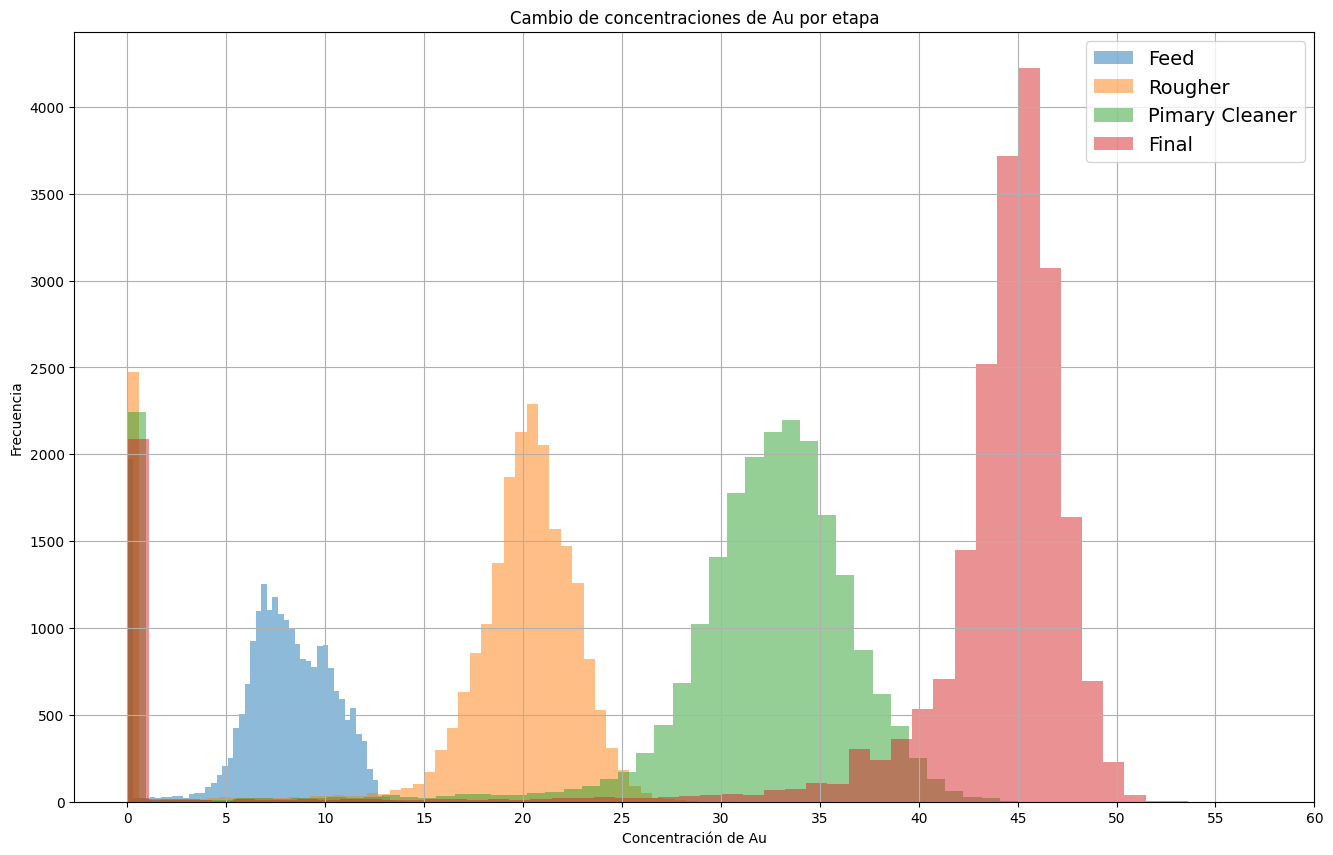

In [64]:
#graficando histogramas en cada etapa para Au
fig, ax = plt.subplots(figsize=(16,10))
df_full['rougher.input.feed_au'].hist(bins=50, alpha=0.5, label='Feed')
df_full['rougher.output.concentrate_au'].hist(bins=50, alpha=0.5, label='Rougher')                      
df_full['primary_cleaner.output.concentrate_au'].hist(bins=50, alpha=0.5, label='Pimary Cleaner')                             
df_full['final.output.concentrate_au'].hist(bins=50, alpha=0.5, label='Final')                    
ax.set_xlabel('Concentración de Au')
ax.set_ylabel('Frecuencia')
ax.set_title('Cambio de concentraciones de Au por etapa')
plt.legend(fontsize=14)
plt.xticks(range(0, 61, 5))
plt.show()

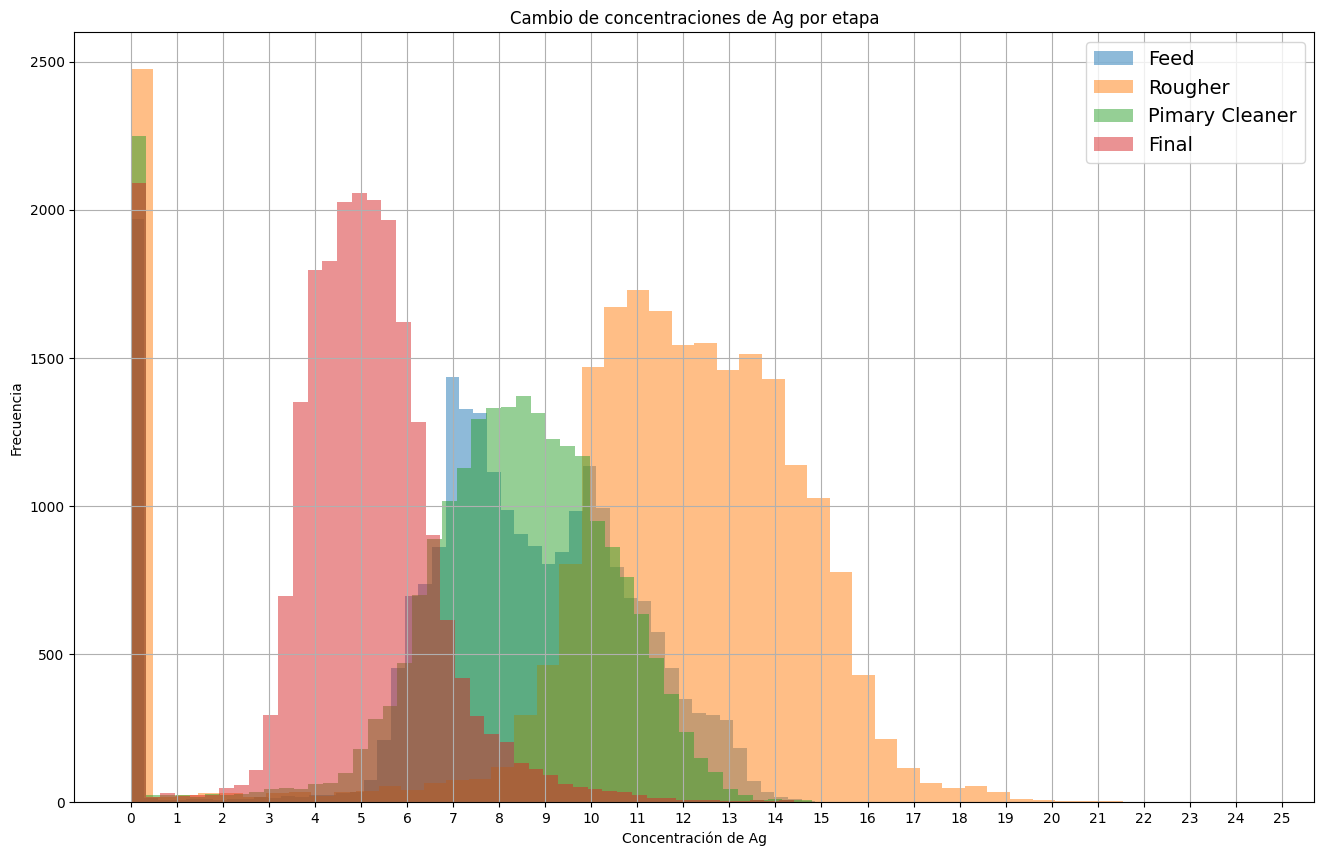

In [65]:
#graficando histogramas en cada etapa para Ag
fig, ax = plt.subplots(figsize=(16,10))
df_full['rougher.input.feed_ag'].hist(bins=50, alpha=0.5, label='Feed')
df_full['rougher.output.concentrate_ag'].hist(bins=50, alpha=0.5, label='Rougher')                      
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=50, alpha=0.5, label='Pimary Cleaner')                             
df_full['final.output.concentrate_ag'].hist(bins=50, alpha=0.5, label='Final')                    
ax.set_xlabel('Concentración de Ag')
ax.set_ylabel('Frecuencia')
ax.set_title('Cambio de concentraciones de Ag por etapa')
plt.legend(fontsize=14)
plt.xticks(range(0, 26, 1))
plt.show()

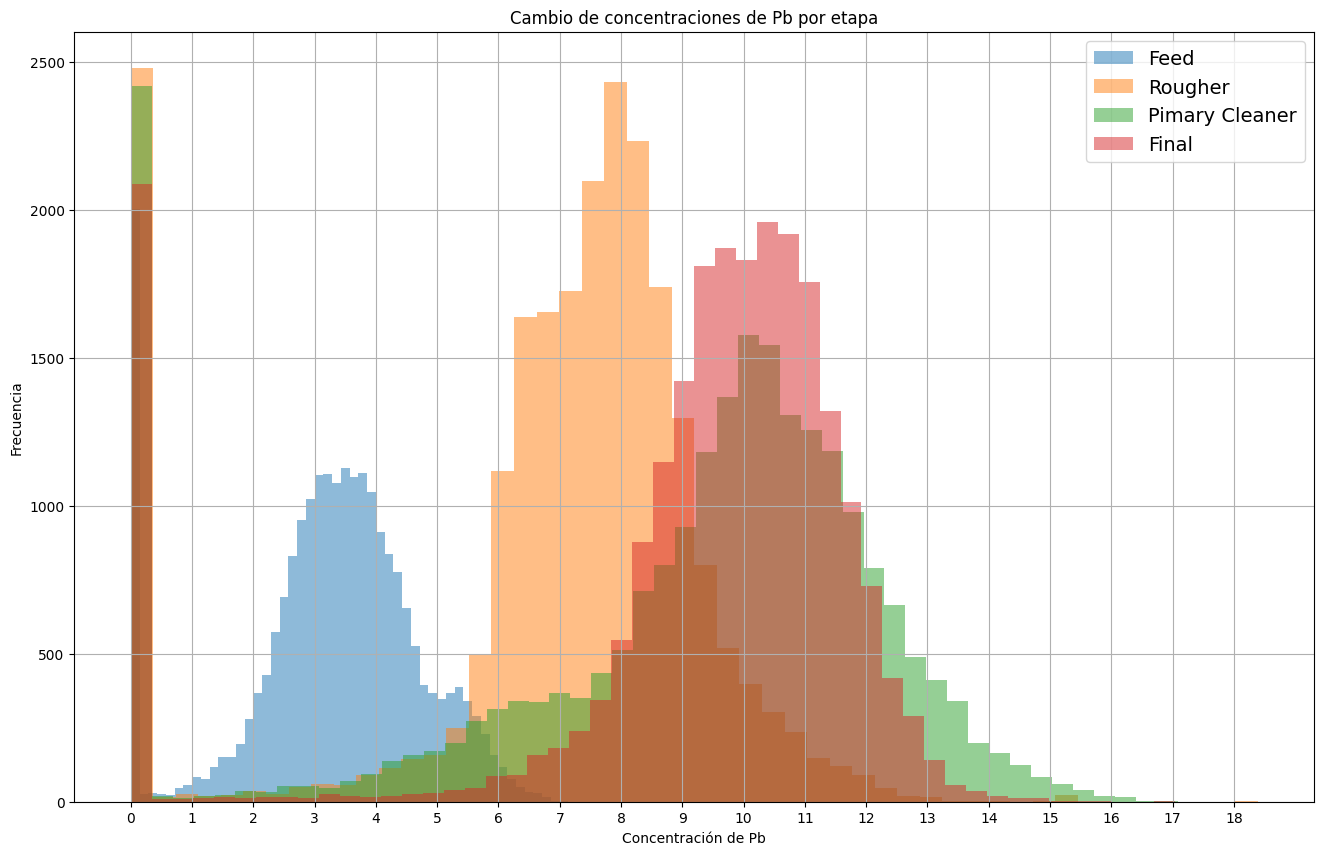

In [66]:
#graficando histogramas en cada etapa para Pb
fig, ax = plt.subplots(figsize=(16,10))
df_full['rougher.input.feed_pb'].hist(bins=50, alpha=0.5, label='Feed')
df_full['rougher.output.concentrate_pb'].hist(bins=50, alpha=0.5, label='Rougher')                      
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=50, alpha=0.5, label='Pimary Cleaner')                             
df_full['final.output.concentrate_pb'].hist(bins=50, alpha=0.5, label='Final')                    
ax.set_xlabel('Concentración de Pb')
ax.set_ylabel('Frecuencia')
ax.set_title('Cambio de concentraciones de Pb por etapa')
plt.legend(fontsize=14)
plt.xticks(range(0, 19, 1))
plt.show()

Observamos como cambian las concentraciones de:
- Au, empieza con alrededor de 8%, luego cambia a alrededor de 20%, 35% y termina en alrededor de 45%.
- Ag, empieza con alrededor de 9%, luego cambia a alrededor de 12%, 8% y termina en alrededor de 5%.
- Pb, empieza con alrededor de 3.5%, luego cambia a alrededor de 7.5%, 10% y termina en alrededor de 10%.
- También observamos que tenemos varios valores en 0 (cero), tanto en las distintas etapas como en los distintos metales, esto se puede deber a que la mezcla de material de oro que se introduce en las plantas de flotación tiene una concentración de 0 por lo que en las demás etapas seguirá siendo 0.

Ahora comparemos las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

El tamaño de las partículas de la alimentación se encuentra en las columna: `rougher.input.feed_size`, tanto para el conjunto de entrenamiento como para el conjunto de prueba. Para comparar las distribuciones debemos comparar la variable con su respectivo dataset.

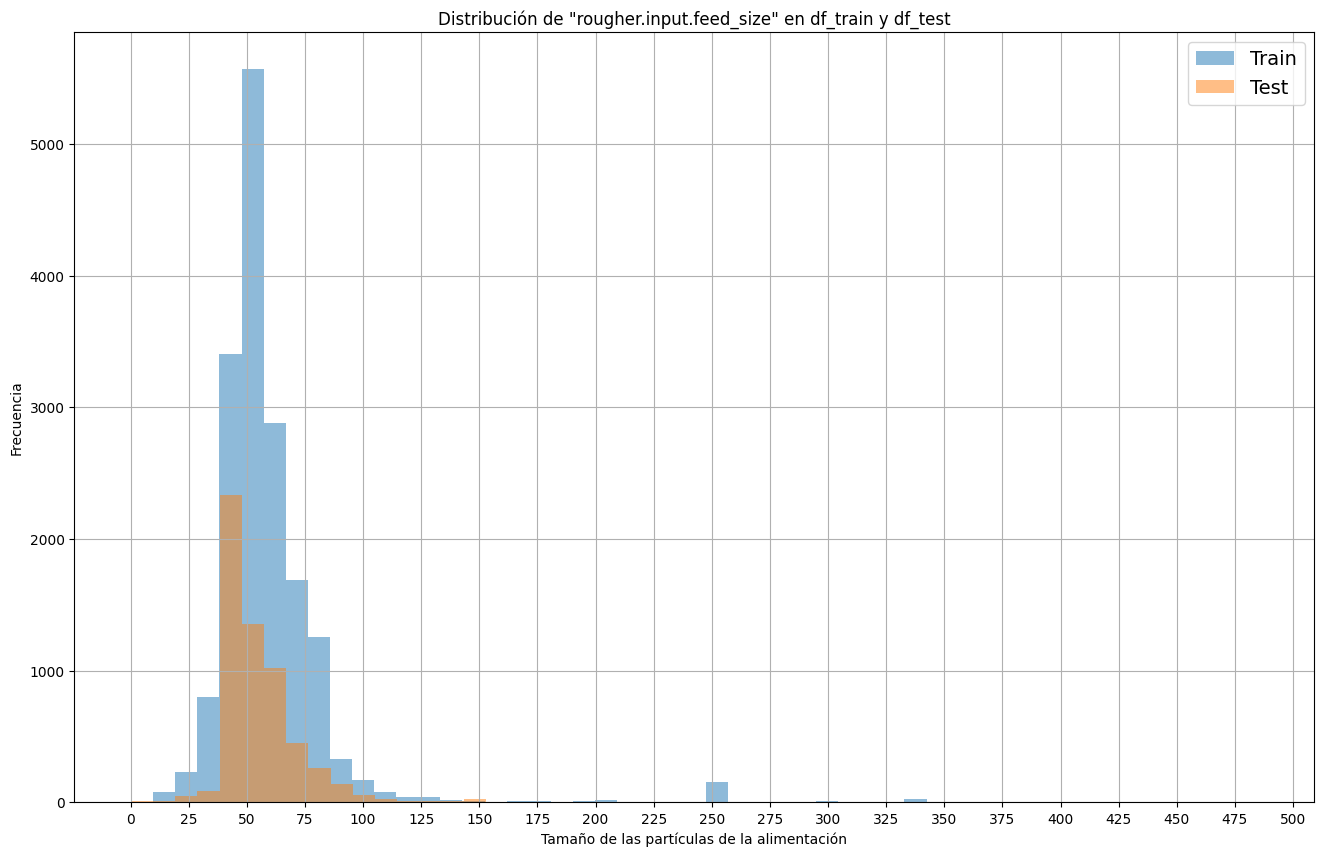

In [67]:
#gráficamos histogramas en nuestra variable
fig, ax = plt.subplots(figsize=(16,10))
df_train['rougher.input.feed_size'].hist(bins=50, alpha=0.5, label='Train')
df_test['rougher.input.feed_size'].hist(bins=50, alpha=0.5, label='Test')
ax.set_xlabel('Tamaño de las partículas de la alimentación')
ax.set_ylabel('Frecuencia')
ax.set_title('Distribución de "rougher.input.feed_size" en df_train y df_test')
plt.legend(fontsize=14)
plt.xticks(range(0, 501, 25))
plt.show()

Visualmente las distribuciones parecen no variar significativamente, más que en tamaño de las frecuencias que se puede deber a que en 'df_train' tenemos una mayor cantidad de datos, pero esto no es suficiente, lo mejor será seguir analizando otras opciones.

In [68]:
#Revisamos las estadíticas de las variables con la función describe()
print('Rougher Feed Size Train Stats:')
print(df_train['rougher.input.feed_size'].describe())
print('Rougher Feed Size Test Stats:')
print(df_test['rougher.input.feed_size'].describe())
#Revisamos la media de cada variable con la función mean()
print('Rougher Feed Size Train Mean:', df_train['rougher.input.feed_size'].mean())
print('Rougher Feed Size Test Mean:', df_test['rougher.input.feed_size'].mean())

Rougher Feed Size Train Stats:
count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64
Rougher Feed Size Test Stats:
count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64
Rougher Feed Size Train Mean: 60.18859533601633
Rougher Feed Size Test Mean: 55.89886568885065


Podemos utilizar la prueba de Kolmogorov-Smirnov para comparar las distribuciones:
- hipótesis nula: no hay diferencia significativa entre la distribución del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba.

In [69]:
#Utilizamos la prueba para 'rougher.input.feed_size'
# Extraemos las columnas de interés de df_train y df_test
train_feed_size = df_train['rougher.input.feed_size']
test_feed_size = df_test['rougher.input.feed_size']

# Realizamos la prueba KS
stat, pval = ks_2samp(train_feed_size, test_feed_size)
#nivel de significación = 0.05
if pval < 0.05:
    print('Las distribuciones de los tamaños de partículas de la alimentación son diferentes (p-value = {})'.format(pval))
else:
    print('Las distribuciones de los tamaños de partículas de la alimentación son similares (p-value = {})'.format(pval))

Las distribuciones de los tamaños de partículas de la alimentación son diferentes (p-value = 6.435943860103117e-135)


Para la variable('rougher.input.feed_size'), dado que el p-value es menor que el nivel de significancia, rechazamos la hipótesis nula, por lo que las distribuciones varían significativamente.

Ahora consideremos las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observamos algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describamos los resultados y eliminemos las anomalías.

Para hallar las concentraciones totales de todas las sustancias debemos sumar las concentraciones de las sustancias que encontramos en las tres etapas(materia prima, concentrado rougher y concentrado final), las cuales son: Ag, Pb, Au y Sol.

In [70]:
#creamos la columna con la concentración total de materia prima
df_full['total_feed'] = df_full[['rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_au',
'rougher.input.feed_sol']].sum(axis=1)

In [71]:
#creamos la columna con la concentración total de concentrado rougher
df_full['total_rougher'] = df_full[['rougher.output.concentrate_ag',
'rougher.output.concentrate_pb',
'rougher.output.concentrate_au',
'rougher.output.concentrate_sol']].sum(axis=1)

In [72]:
#creamos la columna con la concentración total de concentrado final
df_full['total_final'] = df_full[['final.output.concentrate_ag',
'final.output.concentrate_pb',
'final.output.concentrate_au',
'final.output.concentrate_sol']].sum(axis=1)

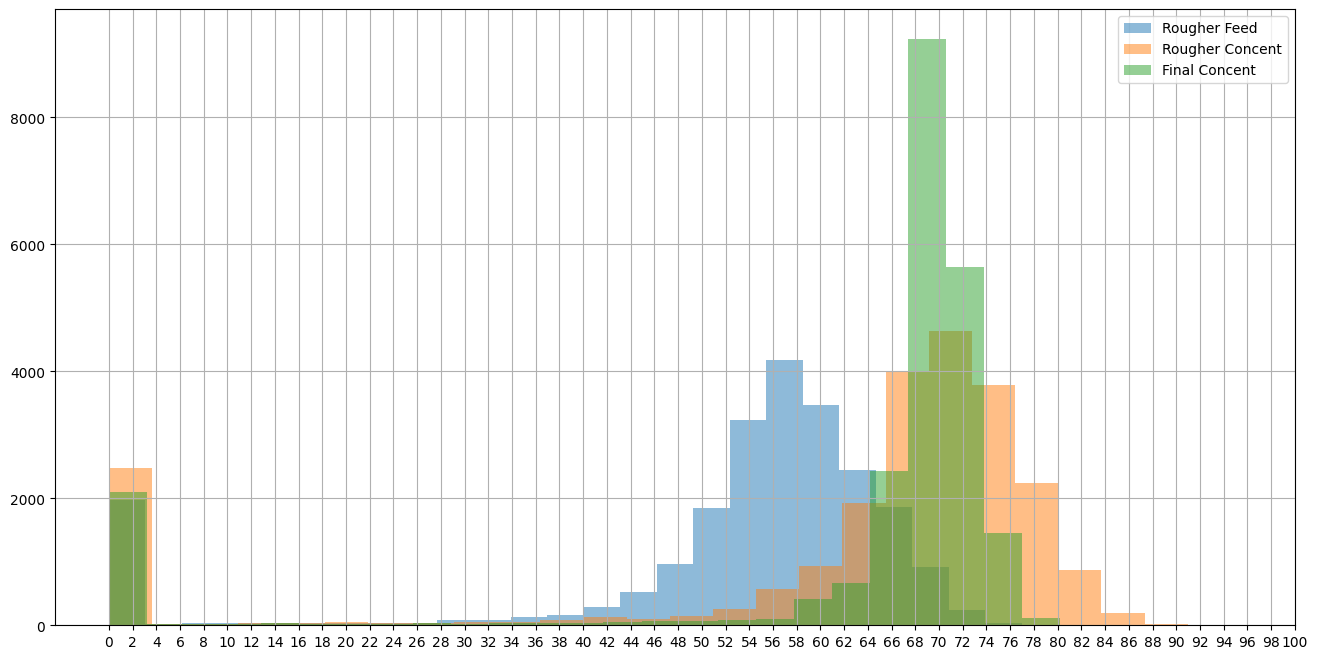

In [73]:
#gráfico para la distribución en 'df_full'
df_full['total_feed'].hist(bins=25, alpha=0.5, figsize=(16, 8), label='Rougher Feed')
df_full['total_rougher'].hist(bins=25, alpha=0.5, figsize=(16, 8), label='Rougher Concent')
df_full['total_final'].hist(bins=25, alpha=0.5, figsize=(16, 8), label='Final Concent')
plt.legend()
plt.xticks(range(0, 101, 2))
plt.show()

AxesSubplot(0.125,0.11;0.775x0.77)


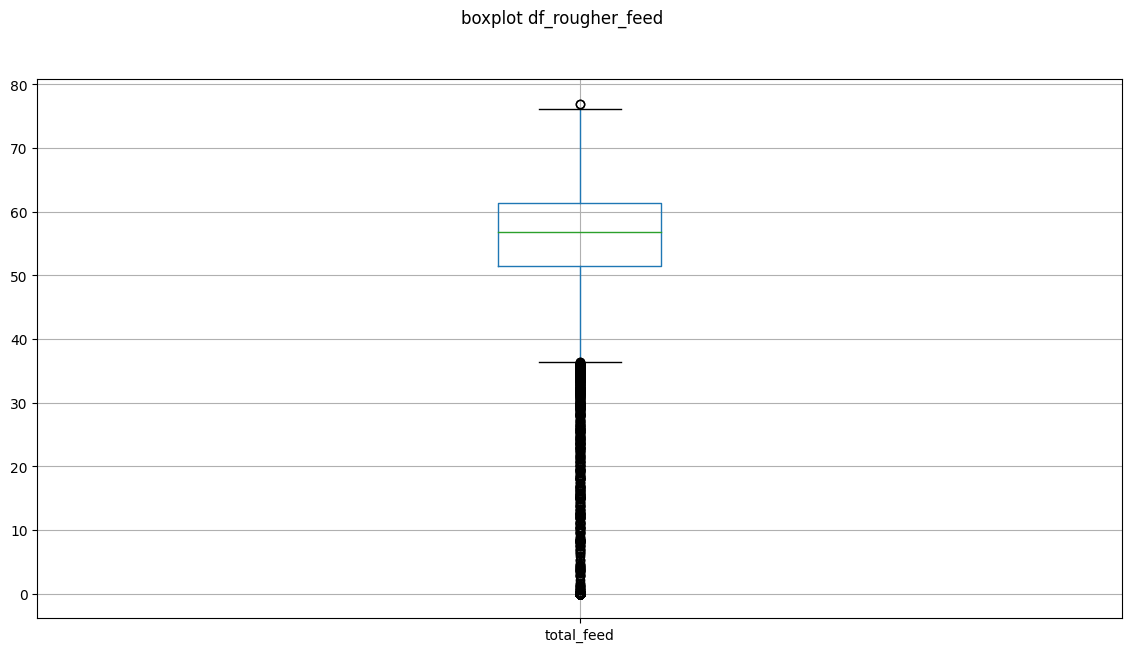

AxesSubplot(0.125,0.11;0.775x0.77)


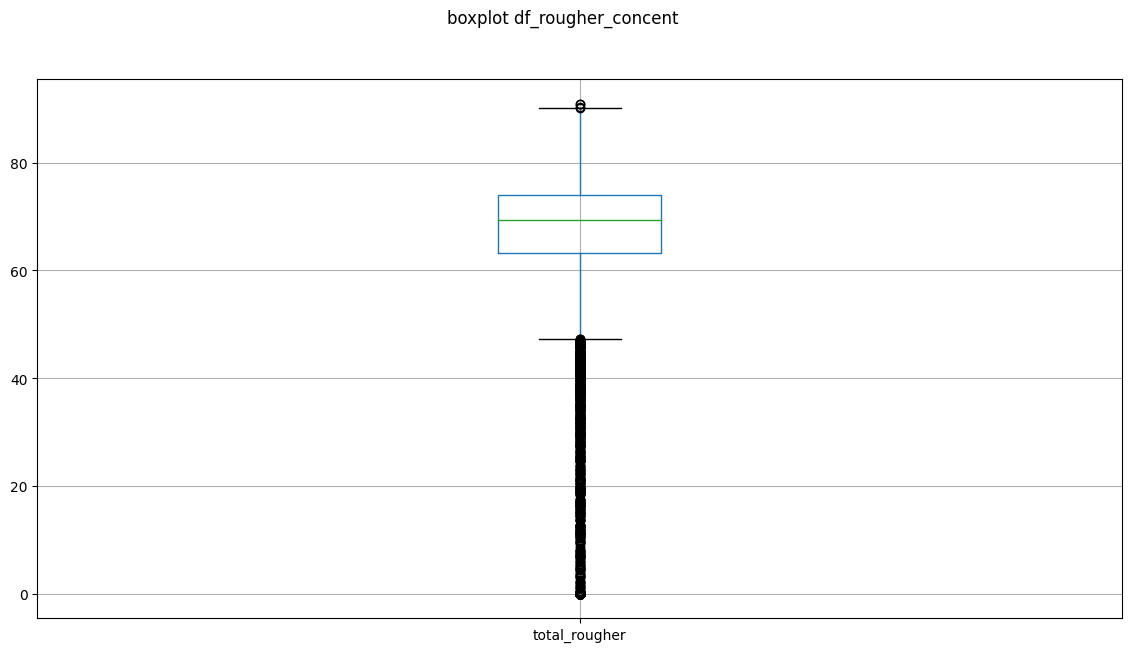

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 0.98, 'boxplot df_final_concent')

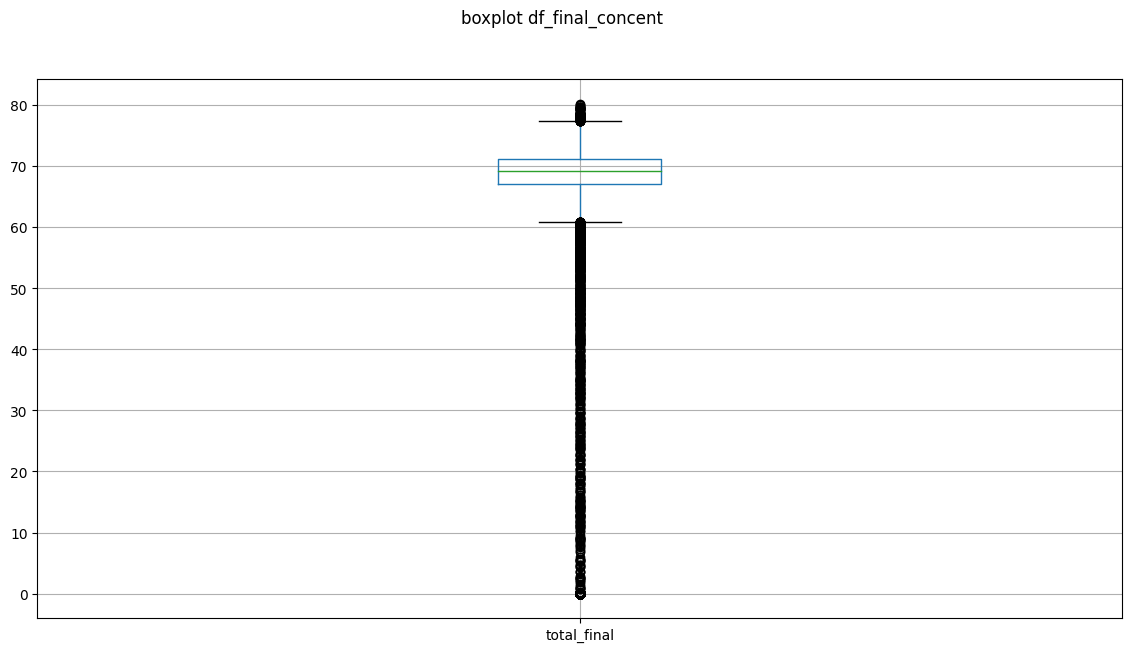

In [74]:
#diagramas de caja para para la variable 'total'
print(df_full.boxplot('total_feed', figsize=(14, 7)))
plt.suptitle('boxplot df_rougher_feed')
plt.show()
print(df_full.boxplot('total_rougher', figsize=(14, 7)))
plt.suptitle('boxplot df_rougher_concent')
plt.show()
print(df_full.boxplot('total_final', figsize=(14, 7)))
plt.suptitle('boxplot df_final_concent')

Podemos observar que existen valores anormales, fijémonos más de cerca:

In [75]:
# Calcular el rango intercuartil (IQR) en 'total feed'
iqr = stats.iqr(df_full['total_feed'])
# Calcular los cuartiles Q1 y Q3
q1 = np.percentile(df_full['total_feed'], 25)
q3 = np.percentile(df_full['total_feed'], 75)
# Calcular los límites inferior y superior
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr
print("El rango de valores atípicos a eliminar en 'total_feed' es: [{}, {}]".format(lim_inf, lim_sup))

# Calcular el rango intercuartil (IQR) en 'total rougher'
iqr = stats.iqr(df_full['total_rougher'])
# Calcular los cuartiles Q1 y Q3
q1 = np.percentile(df_full['total_rougher'], 25)
q3 = np.percentile(df_full['total_rougher'], 75)
# Calcular los límites inferior y superior
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr
print("El rango de valores atípicos a eliminar en 'total_rougher' es: [{}, {}]".format(lim_inf, lim_sup))

# Calcular el rango intercuartil (IQR) en 'total final'
iqr = stats.iqr(df_full['total_final'])
# Calcular los cuartiles Q1 y Q3
q1 = np.percentile(df_full['total_final'], 25)
q3 = np.percentile(df_full['total_final'], 75)
# Calcular los límites inferior y superior
lim_inf = q1 - 1.5*iqr
lim_sup = q3 + 1.5*iqr
print("El rango de valores atípicos a eliminar en 'total_final' es: [{}, {}]".format(lim_inf, lim_sup))

El rango de valores atípicos a eliminar en 'total_feed' es: [36.39222375577147, 76.41376676523588]
El rango de valores atípicos a eliminar en 'total_rougher' es: [47.275204775399516, 90.07560112937028]
El rango de valores atípicos a eliminar en 'total_final' es: [60.85490811215776, 77.30384763655535]


Ya que encontramos el rango para valores anormales o atípicos, veamos que tamaño tienen de nuestro dataset:

In [76]:
#calculemos el tamaño de los valores atípicos
print(df_full[(df_full['total_feed'] < 36.39) | (df_full['total_feed'] > 76.41)].shape)
print(df_full[(df_full['total_rougher'] < 47.28) | (df_full['total_rougher'] > 90.08)].shape)
print(df_full[(df_full['total_final'] < 60.85) | (df_full['total_final'] > 77.30)].shape)
#calculemos el porcentaje de los valores atípicos
print(df_full[(df_full['total_feed'] < 36.39) | (df_full['total_feed'] > 76.41)].shape[0]/df_full.shape[0])
print(df_full[(df_full['total_rougher'] < 47.28) | (df_full['total_rougher'] > 90.08)].shape[0]/df_full.shape[0])
print(df_full[(df_full['total_final'] < 60.85) | (df_full['total_final'] > 77.30)].shape[0]/df_full.shape[0])

(2508, 90)
(3147, 90)
(3242, 90)
0.1104067617538299
0.1385367142102483
0.14271878851910547


Más de 3000 datos, representa un porcentaje muy grande(14%) como para eliminar datos, lo mejor será eliminar los valores extraños que observamos en nuestros histogramas. Observando nuestros histogramas podemos notar que tenemos bastantes valores cercanos a 0, podemos eliminar los valores menores al 5% de concentración total. Primero veamos cuanto representa esto:

In [77]:
#veamos cuantos valores hay en las distintas comparaciones
print(df_full[(df_full['total_feed'] <5)].shape[0])
print(df_full[(df_full['total_feed'] <2.5)].shape[0])
print(df_full[(df_full['total_feed'] <1)].shape[0])
print(df_full[(df_full['total_feed'] ==0)].shape[0])

1997
1974
1966
1584


sigue siendo muy alto el número de valores a eliminar, lo mejor será eliminar solo los valores iguales a 0

In [78]:
# Identificamos las filas que contienen valores atípicos
# Eliminamos las filas que contienen valores atípicos
atypical_feed = df_full[(df_full['total_feed'] ==0)].index
df_full.drop(atypical_feed, inplace=True)

atypical_rougher = df_full[(df_full['total_rougher'] ==0)].index
df_full.drop(atypical_rougher, inplace=True)

atypical_final = df_full[(df_full['total_final'] ==0)].index
df_full.drop(atypical_final, inplace=True)

In [79]:
df_full.shape

(20420, 90)

Ya tenemos nuestro dataset fuente limpio que contiene 20420 filas de las 22716 originalmente, los valores eliminados representan alrededor de un 10% de los datos originales, parece ser un poco alto pero solo se eliminaron los datos que decían que tenemos concentraciones totales de 0.

Ahora debemos hacer lo mismo pero con nuestros dataset de entrenamiento y de prueba, como en nuestro dataset de prueba no tiene algunas columnas que necesitamos para hallar la concentración total debemos completar estos datos. Cuando utilizamos el método merge en el dataset fuente obtendremos un dataset con valores ausentes ya que ya eliminamos los valores extraños, así que solo necesitaremos borrar todas las filas con ausentes en ambas muestras:

In [80]:
#combinamos los dataset de prueba y dataset fuente
df_test = df_test[['date']].merge(df_full, how='left', on='date')
print(df_test.shape)
#Borramos las mismas filas que borramos en el dataset fuente
df_test.dropna(inplace=True)
df_test.shape

(5856, 90)


(5292, 90)

In [81]:
#combinamos los dataset de entrenamiento y dataset fuente
df_train = df_train[['date']].merge(df_full, how='left', on='date')
print(df_train.shape)
#Borramos las mismas filas que borramos en el dataset fuente
df_train.dropna(inplace=True)
df_train.shape

(16860, 90)


(15128, 90)

Ahora debemos dejar nuestros datasets con las columnas originales, eliminemos las columnas que creamos para hacer los análisis

In [82]:
#eliminamos columnas innecesarias
df_train.drop(['total_feed', 'total_rougher', 'total_final'], axis=1, inplace=True)
df_test.drop(['total_feed', 'total_rougher', 'total_final'], axis=1, inplace=True)
df_full.drop(['total_feed', 'total_rougher', 'total_final'], axis=1, inplace=True)

In [83]:
df_full.shape

(20420, 87)

Ahora vamos a revisar como se distribuyen los datos en los distintos dataset:

## Etapa 3. Desarrollar un modelo y entrenarlo
Hay que escribir una función para calcular el valor final de sMAPE(error medio absoluto porcentual simétrico). Que se calcula de la siguiente manera:

![Cálculo del sMAPE](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_smape_1576238825_1589899257.jpg)
![Cálculo del sMAPE](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_y1_1576238832_1589899414.jpg)
Valor del objetivo para la observación con el índice i en el conjunto utilizado para medir la calidad.
![Cálculo del sMAPE](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_yi_1_1576238835_1589899461.jpg)
Valor de la predicción para la observación con el índice i, por ejemplo, en la muestra de prueba.
![Cálculo del sMAPE](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_N_1_1576238819_1589899496.jpg)
Número de observaciones de la muestra.
![Cálculo del sMAPE](https://practicum-content.s3.us-west-1.amazonaws.com/resources/moved_I_1576238817_1589899530.jpg)
Suma de todas las observaciones de la muestra (i toma valores de 1 a N).
Necesitamos predecir dos valores:
- La recuperación del concentrado rougher rougher.output.recovery.
- La recuperación final del concentrado final.output.recovery.

La métrica final incluye los dos valores:
![Cálculo del sMAPE](https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/DS_sprint_10/ES/moved_10.3.2.5ES.png)

In [84]:
def sMAPE_final(target, predictions):
    target = np.array(target)
    target_rougher = target[:,0]
    target_final = target[:,1]
    predictions_rougher = predictions[:,0]
    predictions_final = predictions[:,1]
    #agregamos una pequeña cantidad (1e-9) para evitar este tipo de errores que pueden causar por problemas en la división
    #agregar una pequeña cantidad no afectará significativamente los resultados ya que la cantidad agregada es muy pequeña 
    #en comparación con los valores reales
    error_rougher = np.divide(abs(target_rougher - predictions_rougher), (abs(target_rougher) + abs(predictions_rougher)+1e-9)/2)
    error_final = np.divide(abs(target_final - predictions_final), (abs(target_final) + abs(predictions_final)+1e-9)/2)
    smape_rougher = error_rougher.mean() * 100
    smape_final = error_final.mean() * 100
    combined_error = 0.25 * smape_rougher + 0.75 * smape_final
    return combined_error

- Entrenemos diferentes modelos.
- Evaluamos aplicando la validación cruzada.
- Elegimos el mejor modelo y lo probamos utilizando la muestra de prueba.

In [85]:
#elegimos características y objetivos
df_train = df_train.reset_index(drop=True)
features = df_train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target = df_train[['rougher.output.recovery', 'final.output.recovery']]
#barajeamos el orden de los datos antes de continuar
features, target = shuffle(features, target, random_state=12345)

#elegimos características y objetivos
df_test = df_test.reset_index(drop=True)
features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_test = df_test[['rougher.output.recovery', 'final.output.recovery']]
#barajeamos el orden de los datos antes de continuar
features_test, target_test = shuffle(features_test, target_test, random_state=12345)

In [86]:
# Creamos una función de pérdida a partir de sMAPE_final
sMAPE_scorer = make_scorer(sMAPE_final, greater_is_better=False)

In [87]:
#evaluamos para el modelo DecisionTreeRegressor
for depth in range(1, 6):
    model_1 = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    scores_1 = cross_val_score(model_1, features, target, cv=5, scoring=sMAPE_scorer)
    final_score = sum(scores_1) / len(scores_1)
    print('max_depth =', depth, ': ', end='')
    print('Puntuación media de la evaluación del modelo:', abs(final_score))

max_depth = 1 : Puntuación media de la evaluación del modelo: 9.934668028784161
max_depth = 2 : Puntuación media de la evaluación del modelo: 9.416910245277744
max_depth = 3 : Puntuación media de la evaluación del modelo: 8.380516684004487
max_depth = 4 : Puntuación media de la evaluación del modelo: 7.705959215236805
max_depth = 5 : Puntuación media de la evaluación del modelo: 7.072599268985383


In [88]:
#evaluamos para el modelo RandomForestRegressor
for est in range(20, 51, 10):
    for depth in range(3, 6):
        model_2 = RandomForestRegressor(random_state=54321, n_estimators=est, max_depth=depth)
        scores_2 = cross_val_score(model_2, features, target, cv=5, scoring=sMAPE_scorer)
        final_score_2 = sum(scores_2) / len(scores_2)
        print('n_estimators =', est, ': ', 'max_depth =', depth, ': ', end='')
        print('Puntuación media de la evaluación del modelo:', -final_score_2)     

n_estimators = 20 :  max_depth = 3 : Puntuación media de la evaluación del modelo: 7.986923376183792
n_estimators = 20 :  max_depth = 4 : Puntuación media de la evaluación del modelo: 7.133541594882532
n_estimators = 20 :  max_depth = 5 : Puntuación media de la evaluación del modelo: 6.495507939872274
n_estimators = 30 :  max_depth = 3 : Puntuación media de la evaluación del modelo: 7.971959860048246
n_estimators = 30 :  max_depth = 4 : Puntuación media de la evaluación del modelo: 7.121082709410541
n_estimators = 30 :  max_depth = 5 : Puntuación media de la evaluación del modelo: 6.485930825783795
n_estimators = 40 :  max_depth = 3 : Puntuación media de la evaluación del modelo: 7.980103687085605
n_estimators = 40 :  max_depth = 4 : Puntuación media de la evaluación del modelo: 7.141882548586335
n_estimators = 40 :  max_depth = 5 : Puntuación media de la evaluación del modelo: 6.500861418174935
n_estimators = 50 :  max_depth = 3 : Puntuación media de la evaluación del modelo: 7.990662

In [89]:
#evaluamos para el modelo LinearRegression
model_3 = LinearRegression()
scores_3 = cross_val_score(model_3, features, target, cv=5, scoring=sMAPE_scorer)
final_score_3 = sum(scores_3) / len(scores_3)
print('Puntuación media de la evaluación del modelo:', abs(final_score_3))

Puntuación media de la evaluación del modelo: 3.8424646123316597


Evaluando los tres modelos, encontramos que el modelo de LinearRegression es el mejor modelo ya que tiene el menor error medio absoluto porcentual simétrico de 3.84 mientras que los modelos DecisionTree y RandomForest tienen 7.07 y 6.49 respectivamente. Ahora probaremos utilizando la muestra de prueba.

In [90]:
#definir tu mejor modelo con sus correspondientes hiperparámetros
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(features, target)
predict_LinearRegression_2 = model_LinearRegression.predict(features_test)
score_LinearRegression_2 = sMAPE_final(target_test, predict_LinearRegression_2)
score_LinearRegression_2

3.519689487195583

El valor sMAPE final nos resultó 3.52, lo que representa una mejora respecto al valor previo de 3.84.

## Conclusiones
En el preprocesamiento de los datos:
- Encontramos valores ausentes, pero datos duplicados no. Los valores ausentes se rellenaron utilizando 'fillna' junto a su método 'ffill' por la cercanía en el tiempo.
- De la misma manera se rellenaron los valores ausentes en el dataset de entrenamiento y de prueba.

En el análisis de los datos:
- Observamos cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación, encontramos que Au, se empieza en 8% y se eleva hasta un 45%; Ag, empieza con 9% se eleva un poco y luego cae hasta 5% y Pb, empieza en 3.5% y se eleva hasta 10%.
- Realizamos un análisis gráfico y encontramos las distribuciones de nuestras características, y en nuestra variable de concentraciones totales en su distribución encontramos valores anormales o atípicos, pero resultaron ser muchos, por lo que solo procedimos a eliminar los valores iguales a cero.

No abordamos el equilibrio de clases ya que el proyecto es de regresión:

Lo primero que hicimos para desarrollar modelos en el proyecto fue:
- Creamos una función que calculaba el valor sMAPE final.
- Construimos y probamos con distintos hiperparámetros: modelo de regresión, árbol de decisión y bosque aleatorio.
- Analizando los sMAPE final junto a la validación cruzada de cada modelo, encontramos que el modelo LinearRegression tenía el sMAPE FINAL más bajo (3.84).
- Al probarlo con el dataset de prueba, este nos arrojó un sMAPE final de 3.52 que representa una mejora respecto al valor previo de 3.84.

Logramos cumplir el objetivo del proyecto, el cual era desarrollar con éxito el modelo que prediga la cantidad de oro extraído del mineral de oro, el modelo ideal fue el de ***Regresión Lienal***.